In [1]:
!git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 66 (delta 10), reused 6 (delta 6), pack-reused 41 (from 2)
Receiving objects: 100% (66/66), 13.84 MiB | 6.77 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
%cd wrangling


/content/wrangling


In [3]:
!ls ./assignment/data


airbnb_hw.csv  college_completion.csv  mn_police_use_of_force.csv
CBO_data.pdf   justice_data.parquet    unemployment.xlsx


In [4]:
import pandas as pd

airbnb = pd.read_csv('./assignment/data/airbnb_hw.csv')
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
airbnb['Price'] = airbnb['Price'].replace('[\$,]', '', regex=True).astype(float)
airbnb['Price'].head()


,Price
0,145.0
1,37.0
2,28.0
3,199.0
4,549.0


In [6]:
airbnb['Price'].isnull().sum()

np.int64(0)

The Price column had commas and dollar signs, which can break numeric conversion. I removed those characters using regex. Prices over $999 were stored as strings like “1,112”, and converting them to float required removing the commas.

In [7]:
mn = pd.read_csv('./assignment/data/mn_police_use_of_force.csv')
mn.head()


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [8]:
mn['subject_injury'].value_counts(dropna=False)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [9]:
mn['subject_injury_clean'] = mn['subject_injury'].fillna('Unknown')
mn['subject_injury_clean'] = mn['subject_injury_clean'].apply(
    lambda x: 'Yes' if str(x).strip().lower() == 'yes'
    else 'No' if str(x).strip().lower() == 'no'
    else 'Unknown'
)

In [10]:
missing_prop = (mn['subject_injury'].isnull().mean()) * 100
print(f"Missing values: {missing_prop:.2f}%")


Missing values: 76.19%


A significant portion of subject_injury is missing, which may reflect poor documentation or inconsistent reporting practices.

In [11]:
pd.crosstab(mn['subject_injury_clean'], mn['force_type'])


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Unknown,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [12]:
!ls ./assignment/data


airbnb_hw.csv  college_completion.csv  mn_police_use_of_force.csv
CBO_data.pdf   justice_data.parquet    unemployment.xlsx


In [13]:

pretrial = pd.read_parquet('./data/justice_data.parquet')
pretrial.head()


,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [17]:
import numpy as np

pretrial['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False)


pretrial['WhetherDefendantWasReleasedPretrial'] = pretrial['WhetherDefendantWasReleasedPretrial'].replace('', np.nan)
pretrial['WhetherDefendantWasReleasedPretrial'] = pretrial['WhetherDefendantWasReleasedPretrial'].replace(' ', np.nan)

pretrial['WhetherDefendantWasReleasedPretrial'].isnull().sum()

np.int64(0)

After inspecting WhetherDefendantWasReleasedPretrial, I replaced any empty strings or single-space entries with np.nan. However, no missing values remained after this step, indicating that the column was already complete or inconsistencies were minimal.

In [19]:
pretrial['ImposedSentenceAllChargeInContactEvent'].isnull().mean() * 100  # % missing

np.float64(0.0)

I examined the ImposedSentenceAllChargeInContactEvent variable and found that it contained no missing values. Therefore, no cleaning was necessary. Since the data is complete, there's no concern about missingness being random or not at random in this variable.

In [22]:
sharks = pd.read_csv('./data/sharks.csv', encoding='latin1')  # latin1 handles special characters
sharks.head()


<ipython-input-22-ecf81f6e1955>:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('./data/sharks.csv', encoding='latin1')  # latin1 handles special characters


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
sharks = sharks.dropna(axis=1, how='all')


In [25]:
sharks['Year'].describe()

sharks_recent = sharks[sharks['Year'] >= 1940]


<ipython-input-26-09c3cff7bc4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_recent['Age'] = pd.to_numeric(sharks_recent['Age'], errors='coerce')


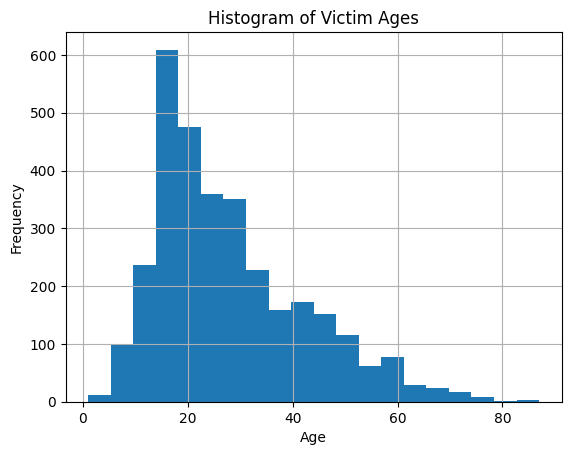

In [26]:
import matplotlib.pyplot as plt

sharks_recent['Age'] = pd.to_numeric(sharks_recent['Age'], errors='coerce')
sharks_recent['Age'].dropna().hist(bins=20)
plt.title('Histogram of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [31]:
def clean_type(x):
    x = str(x).lower()
    if 'provoked' in x:
        return 'Provoked'
    elif 'unprovoked' in x:
        return 'Unprovoked'
    else:
        return 'Unknown'

sharks_recent['Type_Clean'] = sharks_recent['Type'].apply(clean_type)
sharks_recent['Type_Clean'].value_counts(normalize=True)


<ipython-input-31-3e37604b73e2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_recent['Type_Clean'] = sharks_recent['Type'].apply(clean_type)


,proportion
Type_Clean,
Provoked,0.830059
Unknown,0.169941


In [32]:
sharks_recent['Fatal (Y/N)'] = sharks_recent['Fatal (Y/N)'].str.upper().replace({'Y': 'Y', 'N': 'N'}).fillna('Unknown')
sharks_recent['Fatal (Y/N)'].value_counts(normalize=True)


<ipython-input-32-84237232cbe3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_recent['Fatal (Y/N)'] = sharks_recent['Fatal (Y/N)'].str.upper().replace({'Y': 'Y', 'N': 'N'}).fillna('Unknown')


,proportion
Fatal (Y/N),
N,0.759571
Y,0.151104
Unknown,0.079400
UNKNOWN,0.009115
F,0.000405
M,0.000203
2017,0.000203


In [33]:
sharks_recent['Species '] = sharks_recent['Species '].str.lower()
white_shark_attacks = sharks_recent['Species '].str.contains('white').sum()
total_attacks = sharks_recent.shape[0]

white_shark_attacks / total_attacks


<ipython-input-33-e4eaef612e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_recent['Species '] = sharks_recent['Species '].str.lower()


0.12902572412396193

After reviewing the data, I feel that sharks are less dangerous than popular media suggests. Most attacks are unprovoked but rarely fatal. The data helps put their risk in context
 they're not mindless killers, just wild animals interacting with humans in rare cases.



### Q3 ###

**1. What is this paper about?**  
The paper introduces the concept of tidy data, a standardized structure where each variable is a column, each observation is a row, and each type of observational unit is a table. Wickham argues that tidying data is a crucial but underdeveloped part of data analysis and presents tools and principles to streamline the process.



**2. What is the "tidy data standard" intended to accomplish?**  
The tidy data standard aims to simplify data cleaning, analysis, and tool development by promoting a consistent structure. This reduces the need for repeated manual formatting and allows tools to interoperate more easily.



**3.**  
- *“Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”*  
Tidy datasets follow a clear and uniform structure, but messy datasets can vary in structure endlessly, making them harder to fix systematically.

- *“For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.”*  
While analysts often identify variables and observations intuitively, creating a consistent and general definition that applies across datasets is challenging due to context-specific meanings.



**4. How does Wickham define values, variables, and observations?**  
- **Value**: A single data point (e.g., a number or a string)  
- **Variable**: A column containing values that measure the same attribute (e.g., temperature, age)  
- **Observation**: A row with all the variables measured on one unit (e.g., one person or one time point)



**5. How is “Tidy Data” defined in section 2.3?**  
A tidy dataset satisfies these 3 rules:  
1. Each variable is a column  
2. Each observation is a row  
3. Each type of observational unit is a table  



**6. What are the 5 most common problems with messy datasets?**  
1. Column headers are values, not variable names  
2. Multiple variables stored in one column  
3. Variables stored in both rows and columns  
4. Multiple types of observational units stored in one table  
5. One type of unit spread across multiple tables



**7. Why are the data in Table 4 messy?**  
Table 4 places values (income levels) as column headers, which should instead be stored as values in a variable column. This structure hides important variables and makes analysis harder.



**8. What is "melting" a dataset?**  
Melting transforms wide-format data into long-format tidy data. It turns column headers (which are values) into rows under a new variable column, aligning with tidy principles.


**9. Why is Table 11 messy but Table 12 tidy and molten?**  
Table 11 mixes variables in both rows and columns (e.g., days and temperature types), which breaks tidy rules. Table 12 separates each variable into its own column and places each observation in its own row, making it tidy.



**10. What is the "chicken-and-egg" problem with focusing on tidy data?**  
Tidy data is only useful if tools support it, and tools are only developed if tidy data is widely used. This feedback loop makes it hard to break away from inefficient workflows. Wickham hopes more tools and user-centered research will support widespread adoption and better practices for data wrangling.






